## BIG MART SALES PREDICTION
Link to hackathon -- https://datahack.analyticsvidhya.com/?utm_source=feed&utm_medium=navbar
More details on this notebook -- https://medium.com/@kolawoleprecious99/bigmart-outlet-sales-prediction-d57db4d1f4d7
Notebook by -- Precious

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor

#import all libraries and modules at the beginning of the code 

## DATA LOADING

In [2]:
train_data= pd.read_csv("train.csv")
test_data= pd.read_csv("test.csv")
print("train_shape:", train_data.shape) 
print("test_shape:", test_data.shape)

#the read_csv function is used for reading files. We loaded in our already named train.csv, test.csv files, and set it to the names train_data, test_data respectively
#Printing the .shape displays the number of rows and columns in each of the data

train_shape: (8523, 12)
test_shape: (5681, 11)


In [3]:
train_data.head()

#This function returns the first 5 rows of the data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
test_data.head()

#Same function as cell 3

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
train_data.info()

#The function is used to print a concise summary of a DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 566.0+ KB


In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
Item_Identifier              5681 non-null object
Item_Weight                  4705 non-null float64
Item_Fat_Content             5681 non-null object
Item_Visibility              5681 non-null float64
Item_Type                    5681 non-null object
Item_MRP                     5681 non-null float64
Outlet_Identifier            5681 non-null object
Outlet_Establishment_Year    5681 non-null int64
Outlet_Size                  4075 non-null object
Outlet_Location_Type         5681 non-null object
Outlet_Type                  5681 non-null object
dtypes: float64(3), int64(1), object(7)
memory usage: 332.9+ KB


In [7]:
train_data.isnull().sum()

#This will give the column-wise sum of missing values. This returns the counts of NAN, and the total number of entries per group

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
test_data.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [9]:
train_data.corr()

#For checking the correlation of each of the numerical variables to the target value

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


In [10]:
train_data.describe()

#This method is used for calculating some statistical data like percentile, mean, and Std of the numerical values of the data frame.
#The Item_Outlet_Sales is seen to have an average price of 2181, the maximum price of 13086, and minimum price of 33.29.

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## DATA VISUALIZATION

##Learning how to leverage a software tool to visualize data will also enable you to extract information, better understand the data,generate insights, and make more effective decisions.
##The most used Python Libraries for visualization are Matplotlib and Seaborn, imported at the first cell
##Barplot, Countplot, BoxPlot, CatPlot, Heatmap, Histogram, Violin Plot, ScatterPlot, Density, Distribution Plot e.t.c are the types of plots that could be made

## Outlet Type

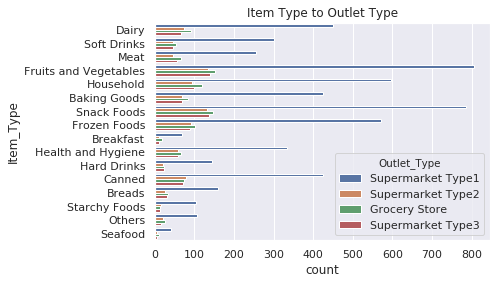

In [11]:
sns.set(style= "darkgrid")
sns.countplot(y= "Item_Type", hue= "Outlet_Type",data= train_data)
plt.title("Item Type to Outlet Type")
plt.show()
##.set() is for adding labels and axis to the plot
##.title() is for adding title to the plot
##.show() is for displaying

#This chart illustrates Supermarket Type 1 as the most sort after. it encompasses most of the products in large amount


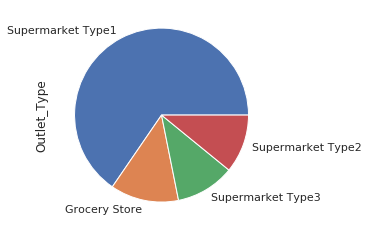

In [12]:
#Same illustration showing how much items can be found in Supermarket Type 1
train_data.Outlet_Type.value_counts().plot(kind= 'pie')
plt.show()

#PieChart is also a type of plot

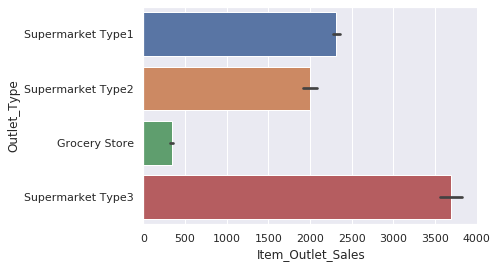

<Figure size 2880x1080 with 0 Axes>

In [13]:
sns.barplot(y= train_data["Outlet_Type"], x= train_data["Item_Outlet_Sales"])
plt.figure(figsize=(40,15))
plt.show()
#In respect to Item Outlet Returns, Supermarket Type 3 makes the highest Sales

## Outlet Location Type

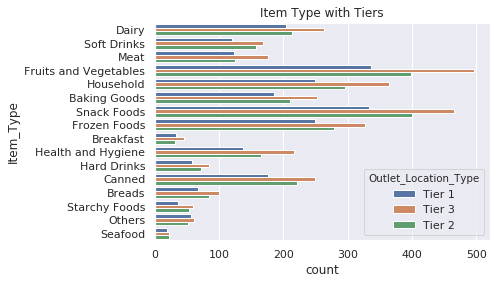

In [14]:
sns.set(style= "darkgrid")
sns.countplot(y= "Item_Type", hue= "Outlet_Location_Type", data= train_data)
plt.title("Item Type with Tiers")
plt.show()
#Tier 3 is seen to encompass more products

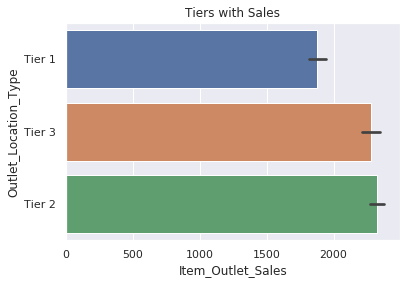

In [15]:
sns.barplot(y=train_data["Outlet_Location_Type"], x= train_data["Item_Outlet_Sales"])
plt.title("Tiers with Sales")
plt.show()
#But this shows Tier 2 as the best sales making cluster


## Item Fat Content

In [16]:
PW= train_data.groupby("Item_Fat_Content").sum().reset_index()
PW
#The reset_index() function is used to generate a new DataFrame or Series with the index reset
#Low fat products are seen to have the best product weight and the best sales

,Item_Fat_Content,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,LF,3328.835,21.054330,43857.1062,631348,6.552424e+05
1,Low Fat,54687.900,326.541080,717390.8394,10167044,1.101503e+07
2,Regular,30341.545,200.970026,409413.1214,5771667,6.457454e+06
3,low fat,1055.375,7.313655,15071.7328,223539,2.338270e+05
4,reg,1361.320,7.764190,15948.6810,233923,2.295765e+05


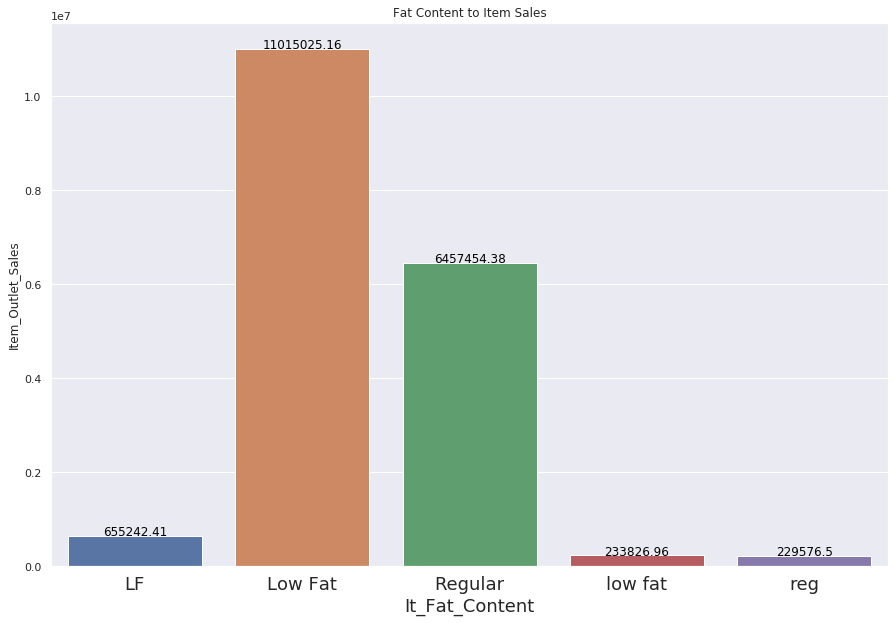

In [17]:
plt.figure(figsize= (15,10))
sns.set(style= "darkgrid")
g= sns.barplot(PW["Item_Fat_Content"], PW["Item_Outlet_Sales"])
for index, row in PW.iterrows():
    g.text(row.name, row.Item_Outlet_Sales, round(row.Item_Outlet_Sales,2), color= "black", ha= "center")
    g.set_xticklabels(g.get_xticklabels(), fontsize= 18)
    g.set_xlabel("It_Fat_Content", fontsize= 18)
plt.title("Fat Content to Item Sales")
plt.show()

#Items with Low fat seems to make the best sales

## Outlet Size

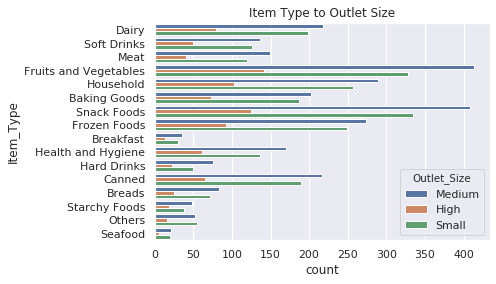

In [18]:
sns.set(style="darkgrid")
sns.countplot( y= "Item_Type", hue= "Outlet_Size", data= train_data)
plt.title("Item Type to Outlet Size")
plt.show()
#Medium sized outlets has most products

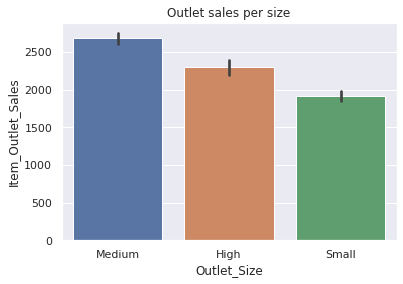

In [19]:
sns.barplot(train_data["Outlet_Size"], train_data["Item_Outlet_Sales"])
plt.title("Outlet sales per size")
plt.show()
#This still ascertain medium sized supermarket as the best sales making market

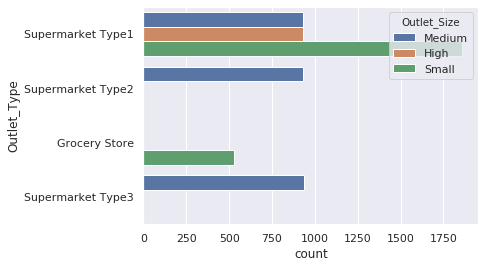

In [20]:
sns.set(style= "darkgrid")
sns.countplot(y= "Outlet_Type", hue= "Outlet_Size", data= train_data)
plt.show()

## Item Type

In [21]:
PV= train_data.groupby("Item_Type").sum().reset_index()
PV

,Item_Type,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,Baking Goods,6580.530,44.821706,81894.7364,1294528,1.265525e+06
1,Breads,2314.775,16.630030,35379.1198,501412,5.532372e+05
2,Breakfast,1136.370,9.429531,15596.6966,219707,2.322990e+05
3,Canned,6632.775,44.215926,90706.7270,1296801,1.444151e+06
4,Dairy,7599.155,49.395349,101276.4596,1362419,1.522594e+06
5,Frozen Foods,9238.550,56.192325,118558.8814,1710309,1.825735e+06
6,Fruits and Vegetables,13476.040,84.407946,178124.0810,2461191,2.820060e+06
7,Hard Drinks,2086.260,13.897707,29334.6766,427610,4.577934e+05
8,Health and Hygiene,5651.195,28.712309,68025.8388,1038822,1.045200e+06
9,Household,10159.015,55.803305,135976.5254,1817984,2.055494e+06


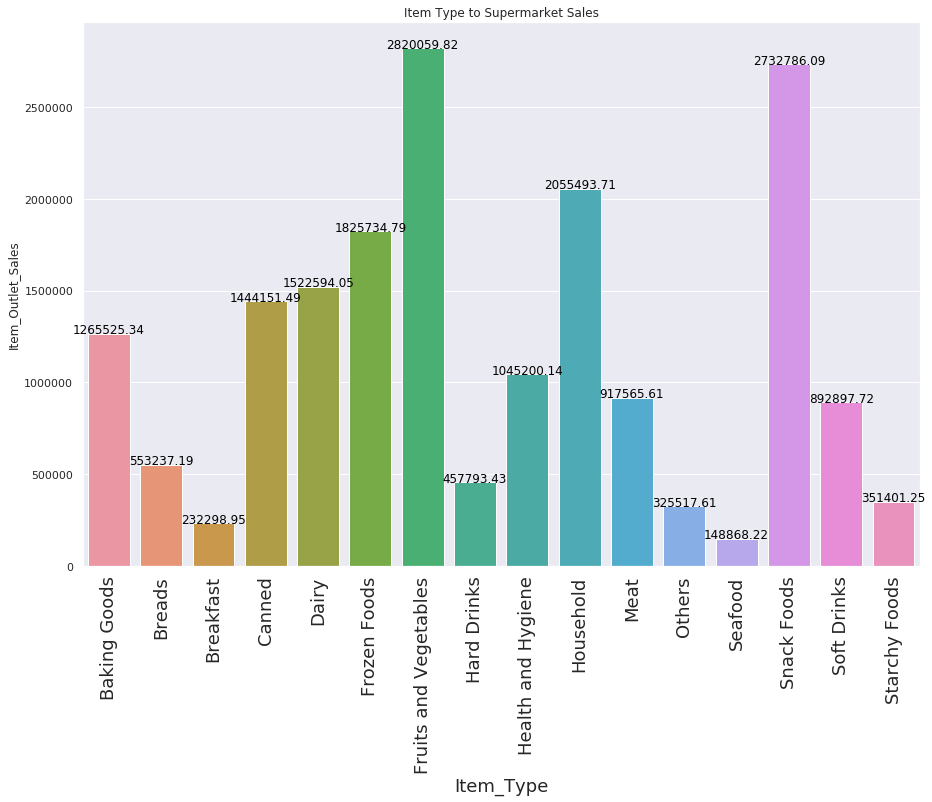

In [22]:
plt.figure(figsize= (15,10))
sns.set(style= "darkgrid")
g= sns.barplot(PV["Item_Type"],PV["Item_Outlet_Sales"])
for index, row in PV.iterrows():
    g.text(row.name, row.Item_Outlet_Sales, round(row.Item_Outlet_Sales,2), color= 'black',ha= 'center')
    g.set_xticklabels(g.get_xticklabels(), rotation= 90, fontsize= 18)
    g.set_xlabel("Item_Type", fontsize= 18)
plt.title("Item Type to Supermarket Sales")
plt.show()
#We clearly see Fruits and vegetables, followed by Snack Foods, Household, Frozen Foods to Diary as the Best Five Sales Making Products


##Based on our visualization, we deduced that;¶
##Supermarket Type 3, Outlet Location Tier 2,and a medium sized outlets are the best for making good sales
##Low Fat Content Items, Item Types like Snack Foods,Fruits and Vegetables are the best Sales Making Items


## DATA PREPROCESSING

In [23]:
train_data.Item_Fat_Content.value_counts()

#value_counts() returns a Series containing counts of unique values. The resulting object will be in descending order so that the first element is the most frequently-occurring element. Excludes NA values by default

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [24]:
train_data.Item_Weight.value_counts()

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.560      2
9.420      1
5.400      1
6.520      1
7.685      1
Name: Item_Weight, Length: 415, dtype: int64

#Dealing with Missing Values

In [25]:
Lf= train_data["Item_Fat_Content"]== "Low Fat"
RG= train_data["Item_Fat_Content"]== "Regular"
LF= train_data["Item_Fat_Content"]== "LF"
lf= train_data["Item_Fat_Content"]== "low fat"
rg= train_data["Item_Fat_Content"]== "reg"


In [26]:
LOW= LF + Lf + lf
REG= RG + rg

#We fill in the Item_Weight missing values with respect to the Item_Fat_Content values. The LF, Low Fat, low fat appears to be the same, so we added them together and set it to the name LOW. Similarly, the Regular and reg set to the name REG.

/data/user/0/ru.iiec.pydroid3/files/arm-linux-androideabi/lib/python3.7/site-packages/pandas/core/computation/expressions.py:194: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  op=op_str, alt_op=unsupported[op_str]


In [27]:
train_data.loc[LOW, "Item_Weight"]= train_data.loc[LOW, "Item_Weight"].fillna(train_data.loc[LOW, "Item_Weight"].mean())
train_data.loc[REG, "Item_Weight"]= train_data.loc[REG, "Item_Weight"].fillna(train_data.loc[LOW, "Item_Weight"].mean())
train_data.isnull().sum()

#The fillna() function is used to fill NA/NaN values using the specified method
#We then got it filled with the mean value

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [28]:
L= test_data["Item_Fat_Content"]== "Low Fat"
R= test_data["Item_Fat_Content"]== "Regular"
LFr= test_data["Item_Fat_Content"]== "LF"
l= test_data["Item_Fat_Content"]== "low fat"
r= test_data["Item_Fat_Content"]== "reg"

In [29]:
low= L+ LFr+ l
reg= R + r

In [30]:
test_data.loc[low, "Item_Weight"]= test_data.loc[low, "Item_Weight"].fillna(test_data.loc[low, "Item_Weight"].mean())
test_data.loc[reg, "Item_Weight"]= test_data.loc[reg, "Item_Weight"].fillna(test_data.loc[low, "Item_Weight"].mean())
test_data.isnull().sum()

#Check cell 14 and 15 for the details 

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [31]:
train_data["Outlet_Size"].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [32]:
train_data["Outlet_Size"]= train_data["Outlet_Size"].fillna("Medium", axis= 0)

In [33]:
test_data["Outlet_Size"]= test_data["Outlet_Size"].fillna("Medium", axis= 0)
test_data.isnull().sum()

#The Outlet_Size, with missing values, is taken care of by filling it with Medium(the value that appears most often).

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [34]:
train_data.dtypes


Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [35]:
train_data["Item_Outlet_Identifier"]= train_data["Item_Identifier"] + train_data["Outlet_Identifier"]
test_data["Item_Outlet_Identifier"]= test_data["Item_Identifier"] + test_data["Outlet_Identifier"]

#The Item_Identifier and the Outlet_Identifier seem to be redundant. However, we did a little feature engineering on the variables by summing up the two variables and setting them to one variable named Item_Outlet_Identifier

## Dealing With Categorical Variables

In [36]:
col= ("Item_Outlet_Identifier","Item_Fat_Content","Item_Type","Outlet_Size","Outlet_Location_Type","Outlet_Type")
for x in col:
    le= LabelEncoder()
    train_data[x]= le.fit_transform(train_data[x].values)
train_data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                      int32
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int32
Outlet_Type                    int32
Item_Outlet_Sales            float64
Item_Outlet_Identifier         int32
dtype: object

In [37]:
cols= ("Item_Outlet_Identifier","Item_Fat_Content","Item_Type","Outlet_Size","Outlet_Location_Type","Outlet_Type")
for y in cols:
    le= LabelEncoder()
    test_data[y]= le.fit_transform(test_data[y].values)
test_data.dtypes

#LabelEncoder can be used to normalize labels. It can also be used to transform non-numerical labels to numerical labels
#We used LabelEncoder on our categorical variables by assigning LabelEncoder to le and then using le.fit_transform.

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                      int32
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int32
Outlet_Type                    int32
Item_Outlet_Identifier         int32
dtype: object

In [38]:
train_new= train_data.drop(["Item_Identifier", "Outlet_Identifier"], axis= 1)
test_new= test_data.drop(["Item_Identifier","Outlet_Identifier"], axis= 1)

#We dropped the initially contrived Item and Outlet Identifier.
#We allotted the train and test data to a new name called train_new and test_new respectively.

## BUILDING A MODEL(PREDICTION)

In [39]:
X= train_new.drop("Item_Outlet_Sales", axis= 1)
y= train_new["Item_Outlet_Sales"]

#Supervised learning shows the connection between two datasets: the observed data X and an external variable y that we are trying to predict, usually called “target” or “labels”.
#The target value Item_Outlet_Sales is assigned to y, and we used the drop function to take the other values in our train_new data to X

In [40]:
train_x, val_x, train_y, val_y= train_test_split(X,y, test_size= 0.2, random_state= 0)

#Train_test_split is a function in Sklearn model selection for splitting data arrays into two subsets
#The line test_size=0.2 suggests that the test data should be 20% of the dataset and the rest should be train data

##Model selection is the process of selecting one final machine learning mode from among a collection of candidate machine learning models for training dataset. Model selection is a process that can be applied both across different types of models (e.g. logistic regression, SVM, KNN e.t.c).

In [41]:
abr= AdaBoostRegressor(n_estimators= 50, learning_rate= 0.1, random_state= 0)
val= abr.fit(train_x, train_y)
pred= abr.predict(val_x)

#We fitted this with AdaBoostRegressor. The parameters are set accordingly
#Fit function adjusts weights according to data values while the Predict function predicts the label of a new set of values.

In [42]:
print("mse:", mean_squared_error(pred,val_y))
print("Rmse:", np.sqrt(mean_squared_error(pred,val_y)))
#Root Mean Squared Error is an absolute measure of fit, interpreted as the standard deviation of the unexplained variance.
#Lower values of RMSE indicate better fit. So our RMSE value is seen to be 1126

mse: 1268992.172916089
Rmse: 1126.495527250814


In [43]:
abr.fit(X,y)
test_yhat= abr.predict(test_new)
#The fit() method takes the training data as arguments. Note that the model is fitted using X and y, but the object holds no reference to X and y. The predicted outcome of our actual test data is now named as test_yhat.

## MAKING A SUBMISSION

In [44]:
submission= pd.read_csv("sample_submission.csv")
submission
#The already downloaded sample submission file is loaded in and dubbed submission

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1000
1,FDW14,OUT017,1000
2,NCN55,OUT010,1000
3,FDQ58,OUT017,1000
4,FDY38,OUT027,1000
...,...,...,...
5676,FDB58,OUT046,1000
5677,FDD47,OUT018,1000
5678,NCO17,OUT045,1000
5679,FDJ26,OUT017,1000


In [45]:
submission.Item_Outlet_Sales= test_yhat
submission
#The variable Item_Outlet_Sales of our submission file is then set to be equals to test_yhat.

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1567.965688
1,FDW14,OUT017,1336.720289
2,NCN55,OUT010,589.285288
3,FDQ58,OUT017,2511.255852
4,FDY38,OUT027,5859.439959
...,...,...,...
5676,FDB58,OUT046,2247.535550
5677,FDD47,OUT018,2926.228032
5678,NCO17,OUT045,2079.721467
5679,FDJ26,OUT017,3568.818283


In [46]:
submission.to_csv("mart.csv", index= False)
#Finally, Pandas to_csv() function converts our result into CSV data. We can pass a file object to write the CSV data into a file and we called the created file Mart.csv.
#You can then proceed to submit!!